# NLP Final Project

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import os
import pandas as pd

dataset = "tarun.csv"

if os.path.isfile(dataset):
    df = pd.read_csv("tarun.csv")
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)
display(df.head(10))

,Unnamed: 0,0,1,2
0,2698442,2,An Amalgam,This book is an amalgam of bits and pieces and...
1,2646715,5,Great!!!,"Well, not much to say. If you saw the first se..."
2,2119569,2,Hit&Miss,Babyface in his hey day always had a Cut that ...
3,816322,5,Great Buy,This text is considered The Bible for any poli...
4,1476562,3,What time is it anyway?,I thought the other reviews weren't serious ab...
5,17087,3,PRETTY FUNNY,"GOOD,BUT UNREALISTIC.THE GUY JUST QUIT GOING T..."
6,1838666,5,Lacy J. Dalton,I saw Lacy on Bill Anderson's Country Reunion ...
7,1442704,4,Great,Easy and enjoyable to watch. I would recommend...
8,1114640,3,Be careful!!!!,I am a very advanced exerciser and have used t...
9,1308335,5,the best book in the world!!!,Sahara special is one of the best books I have...


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df.columns=['overall','title','reviewText']

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     750000 non-null  int64 
 1   title       749983 non-null  object
 2   reviewText  750000 non-null  object
dtypes: int64(1), object(2)
memory usage: 17.2+ MB
None


In [6]:
print(df["reviewText"].iloc[0])

This book is an amalgam of bits and pieces and techniques and strategies from other books about creative thinking on the market. If the reader has read very little in the field, then this book might at least be a start.


# NLP Pre-Processing

In [7]:
sample_review = df["reviewText"].iloc[749999]
print(sample_review)

I have been searching and searching for a good litter box. I Have been through so many and have wasted so much money. When I got this, our smaller and younger cat was all for it. She used it immediately. Our bigger, older kitty was hesitant. I kept an eye on him and now he is using it! There is no mess and it's so much easier to clean! I highly recommend it!!!!


In [8]:
# HTML Entities

In [9]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

I have been searching and searching for a good litter box. I Have been through so many and have wasted so much money. When I got this, our smaller and younger cat was all for it. She used it immediately. Our bigger, older kitty was hesitant. I kept an eye on him and now he is using it! There is no mess and it's so much easier to clean! I highly recommend it!!!!


In [10]:
pattern = r"\&\#[0-9]+\;"
df = df.sample(frac=0.05)
df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[1])

I too experienced a defect within hours of operation where the volume controls became non-respondent leaving the volume frozen at MAXIMUM. Not real happy to ship a new product back to the factory for repair or replacement. And after reading of others who experienced the same problem will this happen again?I hope JBL fixes this volume control bug.


In [11]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
#resources = ["wordnet", "stopwords", "punkt", \
 #            "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]
resources = ["wordnet", "stopwords"]
for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"].iloc[1])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I too experience a defect within hour of operation where the volume control become non-respondent leave the volume frozen at MAXIMUM Not real happy to ship a new product back to the factory for repair or replacement And after reading of others who experience the same problem will this happen again I hope JBL fix this volume control bug
Wall time: 3min 47s


In [12]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"].iloc[1])

I too experience a defect within hour of operation where the volume control become non-respondent leave the volume frozen at MAXIMUM Not real happy to ship a new product back to the factory for repair or replacement And after reading of others who experience the same problem will this happen again I hope JBL fix this volume control bug


In [13]:
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[1])

I too experience a defect within hour of operation where the volume control become non respondent leave the volume frozen at MAXIMUM Not real happy to ship a new product back to the factory for repair or replacement And after reading of others who experience the same problem will this happen again I hope JBL fix this volume control bug


In [14]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[1])

i too experience a defect within hour of operation where the volume control become non respondent leave the volume frozen at maximum not real happy to ship a new product back to the factory for repair or replacement and after reading of others who experience the same problem will this happen again i hope jbl fix this volume control bug


In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"].iloc[1])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

experience defect within hour operation volume control become non respondent leave volume frozen maximum real happy ship new product back factory repair replacement reading others experience problem happen hope jbl fix volume control bug


In [16]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[1])

experience defect within hour operation volume control become non respondent leave volume frozen maximum real happy ship new product back factory repair replacement reading others experience problem happen hope jbl fix volume control bug


In [17]:
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[1])

['experience', 'defect', 'within', 'hour', 'operation', 'volume', 'control', 'become', 'non', 'respondent', 'leave', 'volume', 'frozen', 'maximum', 'real', 'happy', 'ship', 'new', 'product', 'back', 'factory', 'repair', 'replacement', 'reading', 'others', 'experience', 'problem', 'happen', 'hope', 'jbl', 'fix', 'volume', 'control', 'bug']


In [18]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [19]:
tri_gram

In [20]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['minutia', 'gimmecky', 'baloff', 'sweeper', 'liu', 'muldaur', 'u', 'rainulf', 'golightly', 'savgaery', '28joeski', 'fkn', 'intentionality', 'crudest', 'expanded', 'narrowly', 'answersand', 'certifcation', 'perfer', 'reede', 'organisation', 'dialy', 'tolesvery', 'jenkins', 'hairit', 'skyraider', 'popstar', 'rapper', 'filloverall', 'allemal', 'stringent', 'youfre', 'odometer', 'pacificby', 'matrix', 'landfill', 'corpus', 'coulter', 'paraguay', 'beanblossom', 'aziz', 'hoodies', 'mx2700', 'competent', 'revisioning', 'hey', 'marterail', 'robicheaux', '5400', 'penile']


In [21]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'would_recommend', 'much_good', 'year_ago', 'good_book', 'highly_recommend', 'seem_like', 'waste_time', 'pretty_good', 'really_like', 'feel_like', 'book_good', 'work_well', 'long_time', 'book_read', '5_star', 'look_forward', 'really_good', 'waste_money', 'even_though', 'sound_like', 'great_book', 'look_like', 'like_book', 'find_book', 'one_best', 'year_old', 'main_character', 'book_would', 'buy_book', 'recommend_book', 'work_great', 'think_would', 'first_time', 'read_book', 'go_back', 'would_like', '1_2', 'save_money']


In [22]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [23]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[1])

['experience', 'defect', 'within', 'hour', 'operation', 'volume', 'control', 'become', 'non', 'respondent', 'leave', 'volume', 'frozen', 'maximum', 'real', 'happy', 'ship', 'new', 'product', 'back', 'factory', 'repair', 'replacement', 'reading', 'others', 'experience', 'problem', 'happen', 'hope', 'jbl', 'fix', 'volume', 'control', 'bug']


In [24]:
len(tokenized)

37500

In [25]:
tokenized

[['rabid',
  'fan',
  'show',
  '90s',
  'dvd',
  'sorry',
  'folk',
  'measure',
  'show',
  'enjoy',
  '10',
  'year',
  'ago',
  'miss',
  'station',
  'full',
  'people',
  'alien',
  'zocalo',
  'busy',
  'corridor',
  'station',
  'moldy',
  'sleezy',
  'original',
  'episode',
  'b5',
  'would',
  'several',
  'different',
  'character',
  'plot',
  'go',
  'time',
  'enough',
  'go',
  'background',
  'paint',
  'tapestry',
  'old',
  'b5',
  'b5',
  'station',
  'even',
  'feel',
  'far',
  'extra',
  'go',
  'memorial',
  'best',
  'part',
  'dvd',
  'sock',
  'puppet',
  'really',
  'stupid',
  'leave',
  'joke',
  'convention',
  'translate',
  'onto',
  'dvd',
  'tire',
  'jms',
  'arrogant',
  'attitude',
  'understand',
  'may',
  'write',
  'fan',
  'mind',
  'think',
  'fan',
  'deserve',
  'good'],
 ['experience',
  'defect',
  'within',
  'hour',
  'operation',
  'volume',
  'control',
  'become',
  'non',
  'respondent',
  'leave',
  'volume',
  'frozen',
  'maximum

In [26]:
# Transform each text into a vector of word counts
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=corpora)

In [27]:
corpora[1]

'experience defect within hour operation volume control become non respondent leave volume frozen maximum real happy ship new product back factory repair replacement reading others experience problem happen hope jbl fix volume control bug'

In [28]:
label = df["overall"].reset_index().drop('index',axis=1)

In [29]:
label

,overall
0,2
1,3
2,3
3,5
4,1
...,...
37495,5
37496,4
37497,3
37498,3


# Ceate the Dataframe to feed to models such as countvectorizer,word2vec,tfidf

In [30]:
from textblob import TextBlob
import numpy as np

model_df = pd.DataFrame(corpora, columns=['text'])
model_df["label"] = label
model_df = model_df[model_df['label']!= 3]
model_df['Target'] = np.where(model_df['label']>3, 1, 0)
model_df.head(10)


,text,label,Target
0,rabid fan show 90s dvd sorry folk measure show...,2,0
3,absolutely love idea present really focus mill...,5,1
4,sure gorgeous agree scale nuts reviewer first ...,1,0
5,option available sure wish read review throw 9...,1,0
6,first two similar book author remarkable photo...,5,1
7,gary allan gift raw uniqueness sound never obv...,5,1
9,mirrors work great altho hard install last two...,1,0
10,find book car boot sale hundred year old bit h...,5,1
11,buy cpen preparation graduate school use five ...,1,0
12,cd exellent infinite dreams play madness evil ...,5,1


In [31]:
list(corpora)[1]

'experience defect within hour operation volume control become non respondent leave volume frozen maximum real happy ship new product back factory repair replacement reading others experience problem happen hope jbl fix volume control bug'

In [34]:
def polarity_txt(text):
  return TextBlob(text).sentiment[0]

In [35]:

def subj_txt(text):
  return  TextBlob(text).sentiment[1]

In [36]:

def len_text(text):
  if len(text.split())>0:
         return len(corpora[text.index.step])/len(text.split())
  else:
         return 0

In [37]:
model_df['polarity'] = model_df['text'].apply(polarity_txt)
model_df.head(2)

,text,label,Target,polarity
0,rabid fan show 90s dvd sorry folk measure show...,2,0,0.105000
3,absolutely love idea present really focus mill...,5,1,0.249394


In [38]:
model_df['subjectivity'] = model_df['text'].apply(subj_txt)
model_df.head(2)


,text,label,Target,polarity,subjectivity
0,rabid fan show 90s dvd sorry folk measure show...,2,0,0.105000,0.543333
3,absolutely love idea present really focus mill...,5,1,0.249394,0.465758


In [39]:
#model_df['len'] = model_df['text'].apply(len_text)
#model_df.head()

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return [{'pos':  row['polarity'], 'sub': row['subjectivity'], } for _, row in data.iterrows()]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_a = TfidfVectorizer()

training_features = vectorizer_a.fit_transform(model_df["text"])
test_features = vectorizer_a.transform(model_df["text"])


In [42]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the text
            ('text', Pipeline([
                ('selector', ItemSelector(key='text')),
                ('tfidf', vectorizer_a),
            ])),

            # Pipeline for pulling metadata features
            ('stats', Pipeline([
                ('selector', ItemSelector(key=['polarity', 'subjectivity','label'])),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'text': 0.9,
            'stats': 1.5,
        },
    ))
])

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
seed = 40
X = model_df[['text', 'polarity', 'subjectivity','label']]
y = model_df['Target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [44]:
pipeline.fit?

In [45]:
pipeline.fit(x_train)


Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  ItemSelector(key='text')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
                      

In [46]:
%%time
train_vec = pipeline.transform(x_train)
test_vec = pipeline.transform(x_test)
print("Checking that the number of features in train and test correspond: %s - %s" % (train_vec.shape, test_vec.shape))

Checking that the number of features in train and test correspond: (24007, 48307) - (6002, 48307)
Wall time: 3.34 s


In [47]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from datetime import date

clf_sv = LinearSVC(C=1, class_weight='balanced', multi_class='ovr', random_state=40, max_iter=10000) #Support Vector machines
clf_sgd = SGDClassifier(max_iter=200,) # Stochastic Gradient Classifier

In [48]:
%%time
from sklearn.model_selection import cross_val_score

clfs = [clf_sv, clf_sgd]
cv = 3
for clf in clfs:
    scores = cross_val_score(clf,train_vec, y_train, cv=cv, scoring="accuracy" )
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), np.std(scores)))

[0.80882169 0.80754811 0.81267183]
Mean score: 0.810 (+/-0.002)
[0.81481944 0.81554611 0.8187953 ]
Mean score: 0.816 (+/-0.002)
Wall time: 1.2 s


In [49]:

%%time
from sklearn.metrics import classification_report
clf_sv.fit(train_vec, y_train )
y_pred = clf_sv.predict(test_vec)
list_result =[]
list_result.append(("SVC",accuracy_score(y_test, y_pred)))
clf_sgd.fit(train_vec, y_train )
y_pred = clf_sgd.predict(test_vec)
list_result.append(("SGD",accuracy_score(y_test, y_pred)))

Wall time: 625 ms


In [50]:
list_result

[('SVC', 0.8265578140619794), ('SGD', 0.8290569810063312)]

# CountVectorizer Model

In [51]:

#vectorizer
cv=CountVectorizer()
msk = np.random.rand(len(model_df)) < 0.8# this steps generates word counts for the words in your docs
train_data = model_df[msk]
test_data = model_df[~msk]

training_features = cv.fit_transform(train_data["text"])    
test_features = cv.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

Accuracy on the IMDB dataset: 78.01


In [52]:

#vectorizer
#cv=CountVectorizer()
#msk = np.random.rand(len(model_df)) < 0.8# this steps generates word counts for the words in your docs
#train_data = model_df[msk]
#test_data = model_df[~msk]

#training_features = cv.fit_transform(train_data["text"])    
#test_features = cv.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_vec, y_train)
y_pred = model.predict(test_vec)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

Accuracy on the IMDB dataset: 82.64


In [53]:
print((y_train))

[0 0 0 ... 0 0 1]


In [54]:
print((train_data["text"]))

3        absolutely love idea present really focus mill...
4        sure gorgeous agree scale nuts reviewer first ...
5        option available sure wish read review throw 9...
6        first two similar book author remarkable photo...
7        gary allan gift raw uniqueness sound never obv...
                               ...                        
37490    use dr bronner soap year search long time find...
37491    book badly write disorganize character poorly ...
37492    cool notebook stand ever really fold small eno...
37495    big kuhn fan year think understand idea read b...
37499    hey ur reading u must like dk great cd best so...
Name: text, Length: 24007, dtype: object


In [55]:

# Transform each text into a vector of word counts
vectorizer_a = TfidfVectorizer()

training_features = vectorizer_a.fit_transform(train_data["text"])
test_features = vectorizer_a.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 80.76


In [147]:
# Transform each text into a vector of word counts
vectorizer_a = TfidfVectorizer(max_features=10000,stop_words='english')

training_features = vectorizer_a.fit_transform(train_data["text"])
test_features = vectorizer_a.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 79.46


In [57]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)
# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 69.09


In [97]:
training_features

<24007x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 603680 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)
# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 78.96


#best is the  TFIDF model with LinearSVC algorithm as best result

In [59]:
import spacy
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [60]:
nlp = spacy.load('en_core_web_lg')

In [61]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

Using TensorFlow backend.


In [62]:
from sklearn.model_selection import train_test_split
import time
X = model_df['text']
y =model_df['Target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y)
##Create the tf-idf vector
vectorizer = TfidfVectorizer(min_df=3, max_df=0.2, max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = None)

In [63]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify=y)
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.2, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [64]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
 
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]
print(X_train_sequences[0])

[2106, 5715, 8815, 1020, 8647, 165, 14064, 36, 72, 165, 10593, 13167, 8457, 9423, 12774, 2812, 8458, 15390, 6803, 2511, 3148, 578, 38, 8981]


In [65]:
# Compute the max lenght of a text

MAX_SEQ_LENGHT=60

N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

[15554 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554
 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554
 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554 15554
  2106  5715  8815  1020  8647   165 14064    36    72   165 10593 13167
  8457  9423 12774  2812  8458 15390  6803  2511  3148   578    38  8981]


In [66]:

X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [67]:

EMBEDDINGS_LEN = 300

embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass
      
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)

EMBEDDINGS_LEN= 300


In [68]:
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(300, dropout=0.2))
model.add(Dense(len(set(y)), activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 300)           4666500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 602       
Total params: 5,388,302
Trainable params: 721,802
Non-trainable params: 4,666,500
_________________________________________________________________
None


In [69]:
model.fit(X_train_sequences, y_train, 
          epochs=5, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate(X_test_sequences, y_test, verbose=1)
print("Accuracy:", scores[1])  #
list_result.append(("LSTM Simple", scores[1]))


Train on 21606 samples, validate on 2401 samples
Epoch 1/5
21606/21606 [==============================] - 60s 3ms/step - loss: 0.5102 - accuracy: 0.7492 - val_loss: 0.4475 - val_accuracy: 0.7776
Epoch 2/5
21606/21606 [==============================] - 58s 3ms/step - loss: 0.4443 - accuracy: 0.7909 - val_loss: 0.4293 - val_accuracy: 0.7976
Epoch 3/5
21606/21606 [==============================] - 58s 3ms/step - loss: 0.4124 - accuracy: 0.8093 - val_loss: 0.4075 - val_accuracy: 0.8080
Epoch 4/5
21606/21606 [==============================] - 58s 3ms/step - loss: 0.3847 - accuracy: 0.8265 - val_loss: 0.4055 - val_accuracy: 0.8134
Epoch 5/5
6002/6002 [==============================] - 14s 2ms/step
Accuracy: 0.8273908495903015


In [70]:
pd.DataFrame(list_result, columns=['model', 'accuracy'])

,model,accuracy
0,SVC,0.826558
1,SGD,0.829057
2,LSTM Simple,0.827391


# Model LSTM and concatenate new columns


In [71]:
from keras.models import Model
from keras.layers import Dense ,LSTM,concatenate,Input,Flatten,BatchNormalization, GRU

text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(3,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))(text_data)
x2 = ((LSTM(300, dropout=0.2, recurrent_dropout=0.2)))(x)
x4 = concatenate([x2, meta_data])
x5 = Dense(150, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model = Model(inputs=[text_data, meta_data ], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, 60)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 60, 300)      4666500     text[0][0]                       
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 300)          721200      embedding_2[0][0]                
__________________________________________________________________________________________________
meta (InputLayer)               (None, 3)            0                                            
____________________________________________________________________________________________

In [72]:
# LIME for explaining predictions
import lime 
import lime.lime_tabular

In [73]:
train_data['Target']

3        1
4        0
5        0
6        1
7        1
        ..
37490    1
37491    0
37492    1
37495    1
37499    1
Name: Target, Length: 24007, dtype: int32

Random Forest Classifier

Random Forest actually has a native way of supporting datasets that have class imbalance. We will therefore be able to use the original model_df instead of the sample trimmed_df:

The class_weight attribute is provided with a dictionary that represents the associated weight of each class – the majority class is given a 1 and the rest are given the multiplying factor at which they would level with the largest class.
The criteria chosen is entropy which is similar to gini but instead of splitting nodes until there are pure classes, the nodes are split until the classes within have equal probability.

In [156]:
%%time
from sklearn.ensemble import RandomForestClassifier
#forest=RandomForestClassifier()
forest = RandomForestClassifier(n_estimators=50, \
                                criterion="entropy", random_state=42)
#forest.fit(training_features, train_data["Target"])
#y_pred = model.predict(test_features)
forest.fit(train_vec, y_train)
#forest.fit(X_train_sequences, y_train)

Wall time: 25.2 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [157]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [159]:
from sklearn import metrics
#  Make predictions on the test set
model_pred = forest.predict(X_test_sequences)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(test_vec, model_pred))

ValueError: Number of features of the model must match the input. Model n_features is 48307 and input n_features is 60 

Our tuned Random Forest model got a very high score on the training data. The confusion matrix plotted below highlighted how the model almost perfectly classified each Amazon review accordingly.
However, these scores may be misleading since they are based on the data that the model were trained on. This is highly likely a result of overfitting. It is then important to rate our model more effectively without digging into our reserved test set. 

In [119]:
# Evaluation
acc = accuracy_score(y_test, model_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

Accuracy on the IMDB dataset: 48.65


In [120]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
#predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, model_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.5325079238598791


ValueError: multilabel-indicator format is not supported

In [160]:

# Find the residuals
residuals = abs(model_pred - y_test)
    
# Exact the worst and best prediction
wrong = test_vec[np.argmax(residuals), :]
right = test_vec[np.argmin(residuals), :]

In [169]:

# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = test_vec, 
                                                   mode = 'classification',
                                                   training_labels = 'train_vec')

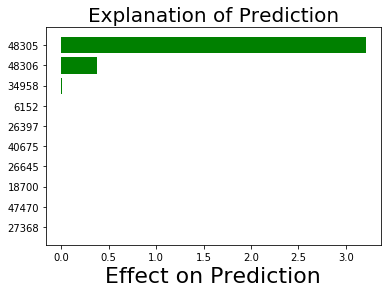

In [170]:
# Display the predicted and true value for the wrong instance
#print('Prediction: %0.4f' % forest.predict(wrong.reshape(1, -1)))
#print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])
# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 10
# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, predict_fn = forest.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 20);
plt.xlabel('Effect on Prediction', size = 22);

In [172]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)

X = train_vec
y = y_train

# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()


clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=2, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.8, max_features=100, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, 
                                                              vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, 
                                                                       bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.782, std: (+/-) 0.001 [RandomForestClassifier]
Mean of: nan, std: (+/-) nan [Bagging RandomForestClassifier]

Mean of: 0.801, std: (+/-) 0.004 [ExtraTreesClassifier]
Mean of: nan, std: (+/-) nan [Bagging ExtraTreesClassifier]

Mean of: 0.703, std: (+/-) 0.003 [KNeighborsClassifier]
Mean of: nan, std: (+/-) nan [Bagging KNeighborsClassifier]

Mean of: nan, std: (+/-) nan [SVC]
Mean of: nan, std: (+/-) nan [Bagging SVC]

Mean of: nan, std: (+/-) nan [RidgeClassifier]
Mean of: nan, std: (+/-) nan [Bagging RidgeClassifier]



In [176]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,VotingClassifier
# Set up voting
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), 
                                    ('KNeighbors', knn)], voting='hard')

for clf, label in zip([rf, et, knn, eclf], ['Random Forest', 'Extra Trees', 
                                                     'KNeighbors', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=2, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))


Mean: 0.783, std: (+/-) 0.001 [Random Forest]
Mean: 0.800, std: (+/-) 0.004 [Extra Trees]
Mean: 0.703, std: (+/-) 0.003 [KNeighbors]
Mean: nan, std: (+/-) nan [Ensemble]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: Multilabel and multi-output classification is not supported.

  FitFailedWarning)


In [177]:
# Set up ensemble voting for bagging
ebclf_array = []

for clf in clf_array:
    ebclf_array.append(BaggingClassifier(clf, max_samples=0.25, 
                                   max_features=10, random_state=seed))

v_eclf = VotingClassifier(estimators=zip(['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors'],
                                         ebclf_array), 
                          voting='hard')

ebclf_array.append(v_eclf)

for clf, label in zip(ebclf_array, ['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: nan, std: (+/-) nan [Bagging Random Forest]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (21606, 2)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (21606, 2)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (21606, 2)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

Mean: nan, std: (+/-) nan [Bagging Extra Trees]
Mean: nan, std: (+/-) nan [Bagging KNeighbors]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (21607, 2)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (21606, 2)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (21606, 2)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

In [180]:
# Now plot the decision regions with only two features
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(12, 10))
labels = ['Random Forest', 'Extra Trees', 'KNN', 'Ensemble']

for clf, lab, grd in zip([rf, et, knn, eclf], 
                         labels,
                         itertools.product([0, 1, 2], repeat = 2)):

    clf.fit(X[[1,2]], y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X[[1,2]]), 
                                y=np.array(y), clf=clf)
    plt.title(lab)

ValueError: Number of labels=24007 does not match number of samples=2

<Figure size 864x720 with 0 Axes>

In [181]:
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

warnings.filterwarnings('ignore')

# Create boosting classifiers
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: nan, std: (+/-) nan [Ada Boost]
Mean: nan, std: (+/-) nan [Grad Boost]
Mean: nan, std: (+/-) nan [XG Boost]
Mean: nan, std: (+/-) nan [Ensemble]


In [182]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(12, 10))

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, lab, grd in zip([ada_boost, grad_boost, xgb_boost, eclf],
                         labels,
                         itertools.product([0, 1], repeat = 2)):

    clf.fit(X[[1, 2]].values, y.values)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X[[1, 2]].values), 
                                y=np.array(y.values), clf=clf)

AttributeError: values not found

<Figure size 864x720 with 0 Axes>

In [ ]:
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

seed = 1075

ensemble = SuperLearner(scorer = accuracy_score, 
                        random_state=seed, 
                        folds=10,
                        verbose = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# Build the first layer
ensemble.add([rf, et, knn, rg])
# Attach the final meta estimator
ensemble.add_meta(lr)

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)
print("Fit data:\n%r" % ensemble.data)
print("Accuracy score: {:.3f}".format(accuracy_score(preds, y_test)))

In [ ]:
from itertools import combinations

names = ['Random Forest', 'Extra Trees', 'KNeighbors']

def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([list(map(list, combinations(arg, i))) for i in range(len(arg) + 1)], [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])

stacked_clf_list = zip_stacked_classifiers(clf_array, names)

best_combination = [0.00, ""]

for clf in stacked_clf_list:
    
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = seed, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(lr)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: {:.3f} {}".format(accuracy, clf[1]))

print("\nBest stacking model is {} with accuracy of: {:.3f}".format(best_combination[1], best_combination[0]))